<a href="https://colab.research.google.com/github/amalsunfiya/DEEP-LEARNING-PROJECT/blob/main/HANDWRITTEN_DIGITS_RECOGNITION_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project Charter
>**TITLE :**
**Handwritten digits recognition**

>**AIM :** To analyze and predict the result whether the given handwritten pattern is matched or not

>**KEY TAKEAWAYS :**
* This process involves Configuring tensorboard,Loading and exporting of data.
* This involves Deep learning algorithms which will result in performance metrics of the model.
* The well-doing algorithm is implemented in the model and checking results with the real-time data.

>**DATASET :** https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz

# Handwritten digits recognition (using Convolutional Neural Network)

In [1]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import pandas as pd
import math
import datetime
import platform

## Configuring Tensorboard


In [3]:
%load_ext tensorboard

In [4]:
!rm -rf ./.logs/

## Load the data

In [5]:
mnist_dataset= tf.keras.datasets.mnist
(x_train,y_train), (x_test,y_test)= mnist_dataset.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)

x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)


In [7]:
(_, IMAGE_WIDTH, IMAGE_HEIGHT) = x_train.shape
IMAGE_CHANNELS = 1
print('IMAGE_WIDTH:', IMAGE_WIDTH);
print('IMAGE_HEIGHT:', IMAGE_HEIGHT);
print('IMAGE_CHANNELS:', IMAGE_CHANNELS);

IMAGE_WIDTH: 28
IMAGE_HEIGHT: 28
IMAGE_CHANNELS: 1


## Explore the data

In [8]:
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,...,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,...,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,...,0,0,0,0,0,0,0,0,0,0


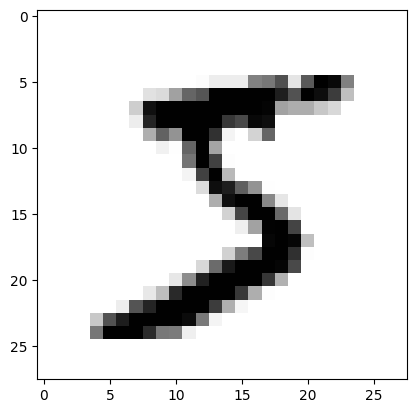

In [9]:
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

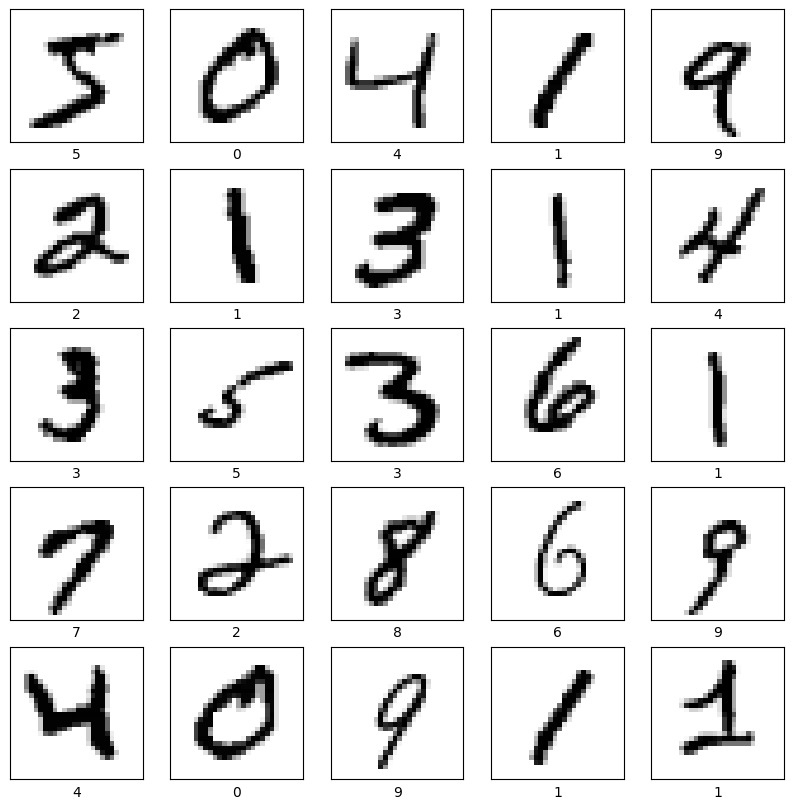

In [10]:
numbers_to_display = 25
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(10,10))
for i in range(numbers_to_display):
    plt.subplot(num_cells, num_cells, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

## Reshaping the data


In [11]:
x_train_with_chanels = x_train.reshape(x_train.shape[0], IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)
x_test_with_chanels = x_test.reshape(x_test.shape[0], IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)

In [12]:
print('x_train_with_chanels:', x_train_with_chanels.shape)
print('x_test_with_chanels:', x_test_with_chanels.shape)

x_train_with_chanels: (60000, 28, 28, 1)
x_test_with_chanels: (10000, 28, 28, 1)


## Normalize the data

In [13]:
x_train_normalized = x_train_with_chanels / 255
x_test_normalized = x_test_with_chanels / 255

In [14]:
x_train_normalized[0][18]

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.18039216],
       [0.50980392],
       [0.71764706],
       [0.99215686],
       [0.99215686],
       [0.81176471],
       [0.00784314],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ]])

## Build the model

In [15]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Convolution2D(input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS),
          kernel_size=5, filters=8, strides=1, activation=tf.keras.activations.relu, kernel_initializer=tf.keras.initializers.VarianceScaling()))

model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(tf.keras.layers.Convolution2D(kernel_size=5, filters=16, strides=1, activation=tf.keras.activations.relu,
          kernel_initializer=tf.keras.initializers.VarianceScaling()))

model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(units=128, activation=tf.keras.activations.relu));

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(units=10, activation=tf.keras.activations.softmax, kernel_initializer=tf.keras.initializers.VarianceScaling()))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 24, 24, 8)           │             208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 8, 8, 16)            │           3,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 4, 4, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 37,610 (146.91 KB)

 Trainable params: 37,610 (146.91 KB)

 Non-trainable params: 0 (0.00 B)

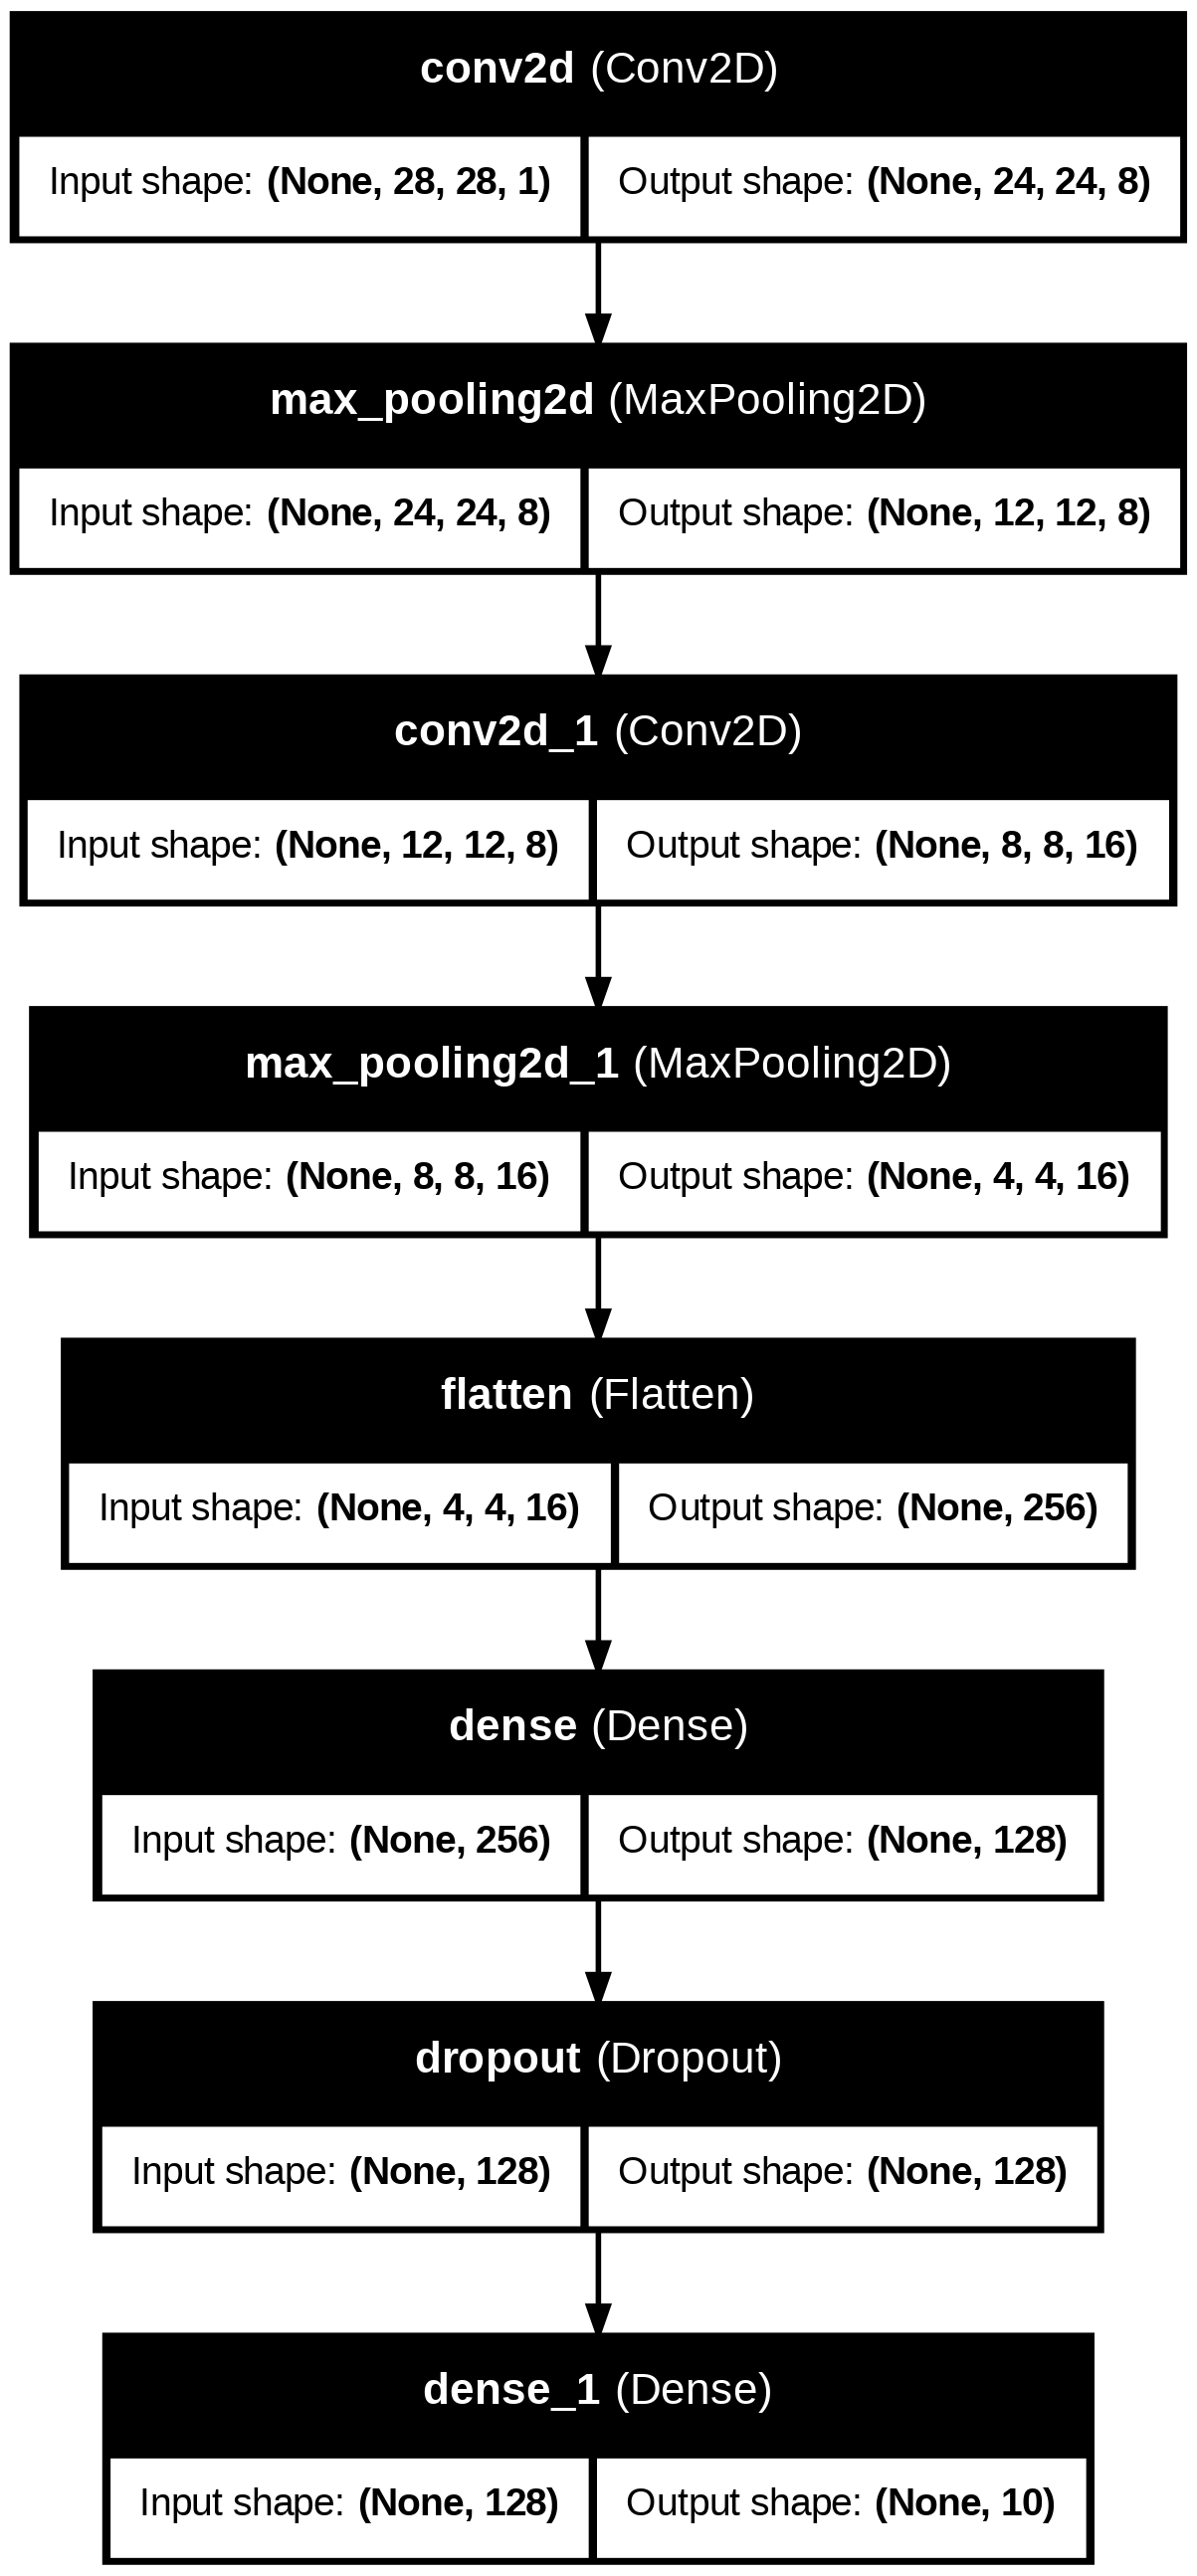

In [17]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)

## Compile the model

In [18]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=adam_optimizer, loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

## Train the model

In [19]:
log_dir=".logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

training_history = model.fit(x_train_normalized, y_train, epochs=10, validation_data=(x_test_normalized, y_test), callbacks=[tensorboard_callback])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 19ms/step - accuracy: 0.8644 - loss: 0.4444 - val_accuracy: 0.9810 - val_loss: 0.0590
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.9767 - loss: 0.0771 - val_accuracy: 0.9864 - val_loss: 0.0443
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.9830 - loss: 0.0559 - val_accuracy: 0.9893 - val_loss: 0.0315
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9871 - loss: 0.0416 - val_accuracy: 0.9893 - val_loss: 0.0361
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - accuracy: 0.9888 - loss: 0.0347 - val_accuracy: 0.9909 - val_loss: 0.0293
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9903 - loss: 0.0296 - val_accuracy: 0.9900 - val_loss: 0.0314
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - accuracy: 0.9921 - loss: 0.0242 - val_accuracy: 0.9892 - val_loss: 0.0335
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - accuracy: 0.9936 -

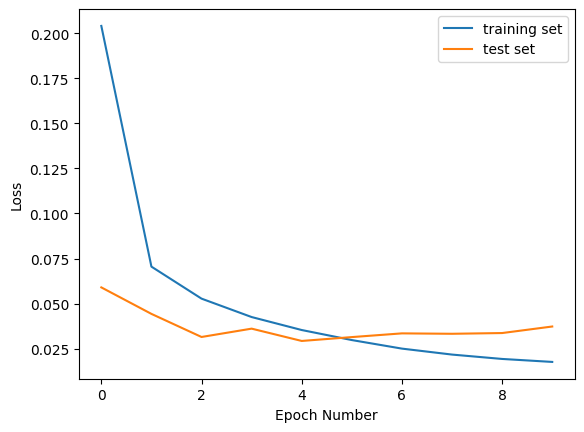

In [20]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(training_history.history['loss'], label='training set')
plt.plot(training_history.history['val_loss'], label='test set')
plt.legend()

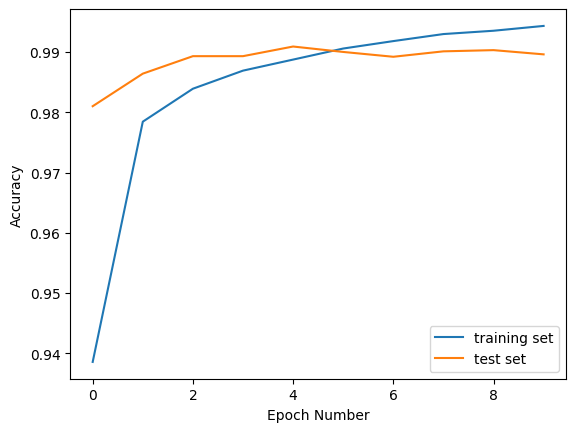

In [21]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], label='training set')
plt.plot(training_history.history['val_accuracy'], label='test set')
plt.legend()

## Evaluate model accuracy

### Training set accuracy

In [22]:
%%capture
train_loss, train_accuracy = model.evaluate(x_train_normalized, y_train)

In [23]:
print('Training loss: ', train_loss)
print('Training accuracy: ', train_accuracy)

Training loss:  0.010764461942017078
Training accuracy:  0.9965999722480774


### Test set accuracy

In [24]:
%%capture
validation_loss, validation_accuracy = model.evaluate(x_test_normalized, y_test)

In [25]:
print('Validation loss: ', validation_loss)
print('Validation accuracy: ', validation_accuracy)

Validation loss:  0.03729796037077904
Validation accuracy:  0.9896000027656555


## Save the model

In [26]:
model_name = 'digits_recognition_cnn.h5'
model.save(model_name, save_format='h5')

In [27]:
loaded_model = tf.keras.models.load_model(model_name)

## Use the model


In [28]:
predictions_one_hot = loaded_model.predict([x_test_normalized])

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [29]:
print('predictions_one_hot:', predictions_one_hot.shape)

predictions_one_hot: (10000, 10)


In [30]:
# Predictions in form of one-hot vectors (arrays of probabilities).
pd.DataFrame(predictions_one_hot)

,0,1,2,3,4,5,6,7,8,9
0,1.172724e-14,9.015632e-10,1.084912e-11,1.009207e-11,8.777546e-12,5.063123e-13,1.300531e-21,9.999999e-01,2.556232e-14,7.948937e-11
1,1.102844e-09,3.192595e-10,9.999999e-01,1.084946e-10,9.563160e-17,1.869948e-17,6.096309e-12,1.067273e-12,9.395735e-10,6.551105e-17
2,6.993163e-08,9.999984e-01,8.363800e-08,3.254277e-11,3.617378e-08,2.546824e-08,1.434302e-07,9.093502e-07,1.835741e-07,4.769057e-09
3,9.999995e-01,1.392570e-12,1.299534e-09,1.091267e-10,8.883143e-12,3.174292e-10,3.148976e-07,1.275423e-08,3.800480e-09,1.409615e-07
4,1.012762e-13,8.696877e-11,1.685576e-13,5.839897e-15,9.999999e-01,4.515054e-12,1.013107e-11,6.295423e-11,2.883879e-13,2.043111e-08
...,...,...,...,...,...,...,...,...,...,...
9995,3.697915e-16,2.197626e-09,9.999999e-01,1.163672e-08,8.883785e-21,1.323705e-21,1.917283e-23,7.604115e-09,6.201764e-13,8.421353e-17
9996,1.376682e-11,8.252258e-09,2.648217e-08,9.999986e-01,2.314124e-12,2.936895e-08,5.682685e-18,6.974330e-08,8.893588e-10,1.184355e-06
9997,2.834098e-18,6.189118e-10,6.100021e-15,2.717248e-20,9.999999e-01,2.487012e-17,7.392696e-14,8.743722e-13,3.222659e-10,1.492550e-14
9998,2.953231e-11,8.109408e-17,5.067237e-15,1.951868e-09,5.010943e-12,9.992495e-01,3.738711e-09,1.996443e-11,7.505324e-04,2.849022e-13


In [31]:
# Let's extract predictions with highest probabilites and detect what digits have been actually recognized.
predictions = np.argmax(predictions_one_hot, axis=1)
pd.DataFrame(predictions)

,0
0,7
1,2
2,1
3,0
4,4
...,...
9995,2
9996,3
9997,4
9998,5


In [32]:
print(predictions[0])

7


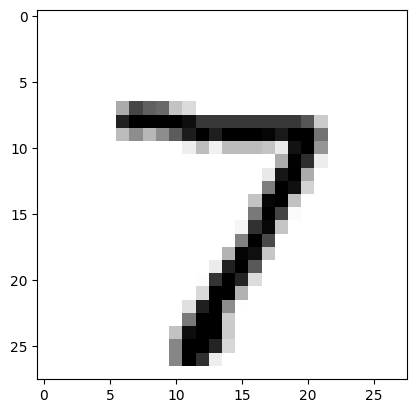

In [33]:
plt.imshow(x_test_normalized[0].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=plt.cm.binary)
plt.show()

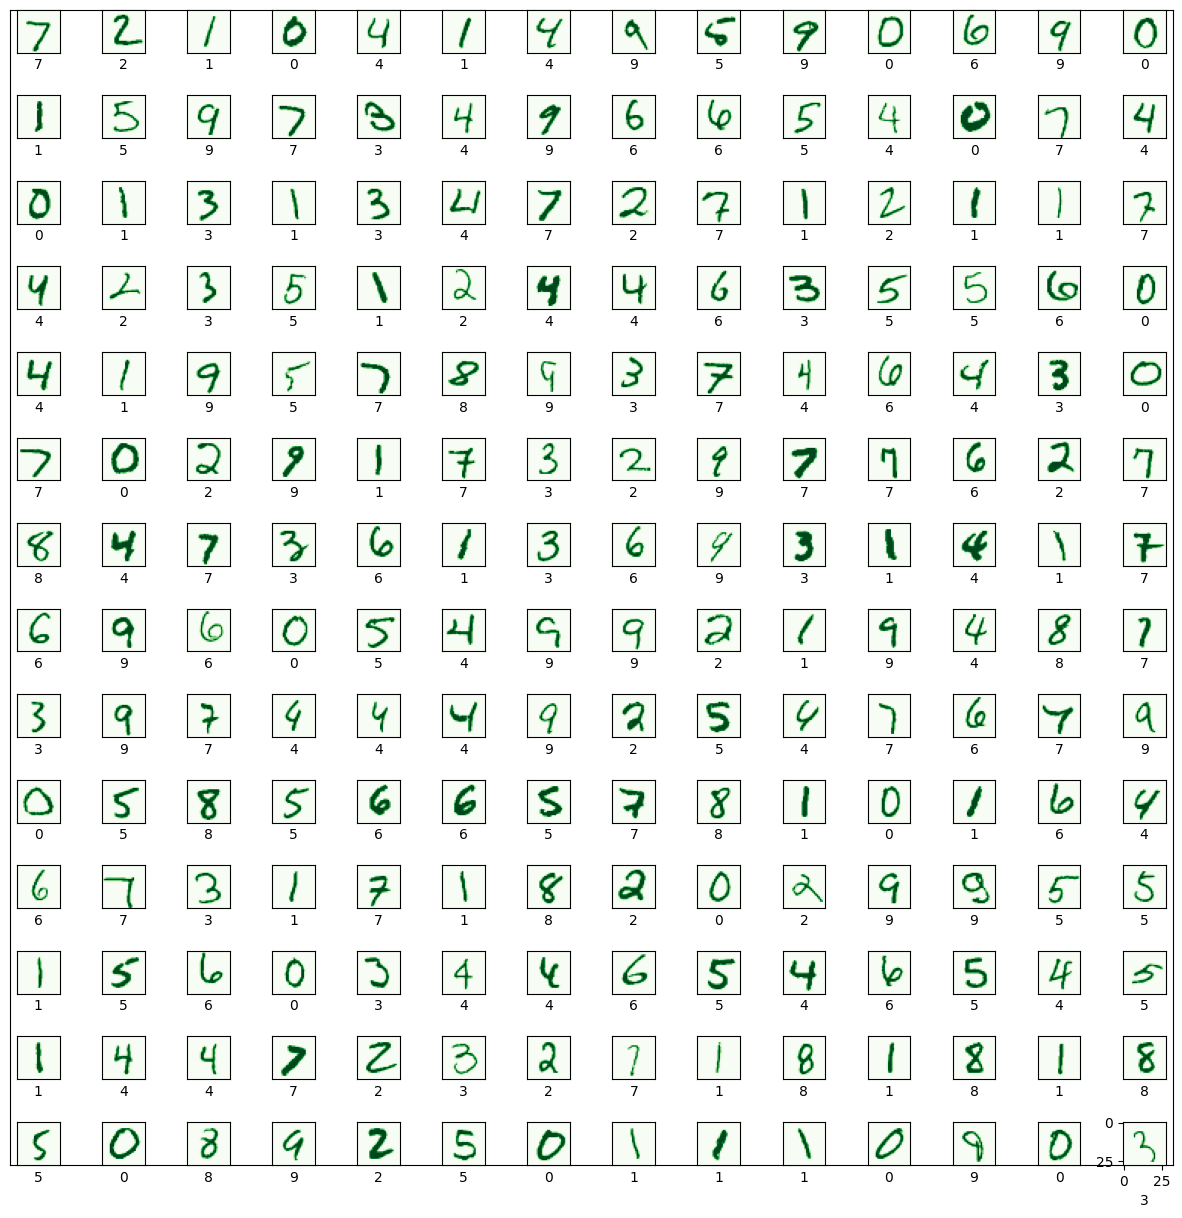

In [34]:
numbers_to_display = 196
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(15, 15))
for plot_index in range(numbers_to_display):
    predicted_label = predictions[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    color_map = 'Greens' if predicted_label == y_test[plot_index] else 'Reds'
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(x_test_normalized[plot_index].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=color_map)
    plt.xlabel(predicted_label)
plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()

## Plotting a confusion matrix



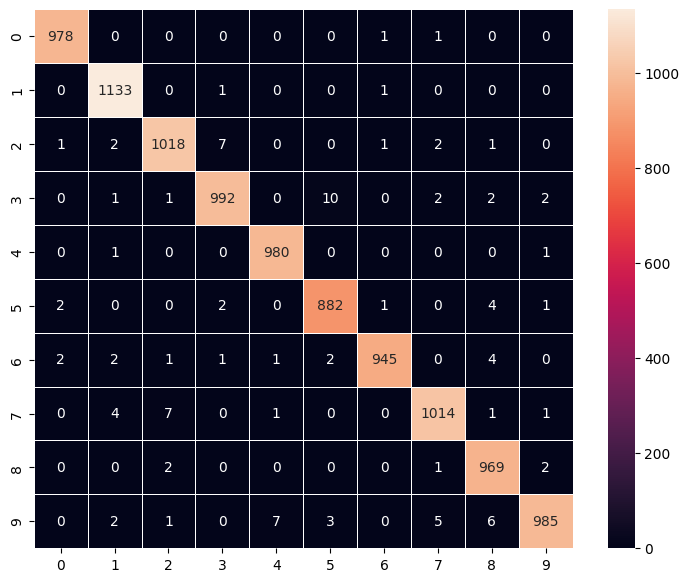

In [35]:
confusion_matrix = tf.math.confusion_matrix(y_test, predictions)
f, ax = plt.subplots(figsize=(9, 7))
sn.heatmap(confusion_matrix, annot=True, linewidths=.5, fmt="d", square=True, ax=ax)
plt.show()